In [16]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

## The digits recognition dataset

In [17]:
# Load the digits dataset: digits
digits = datasets.load_digits()

In [18]:
# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits['DESCR'])

dict_keys(['images', 'target_names', 'data', 'DESCR', 'target'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [19]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


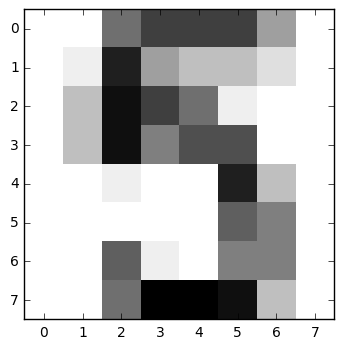

In [20]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation='nearest')
plt.show()

## Train/Test Split + Fit/Predict/Accuracy

In [21]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [22]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 21, stratify = y)

In [23]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors= 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.977736549165


## Overfitting and underfitting

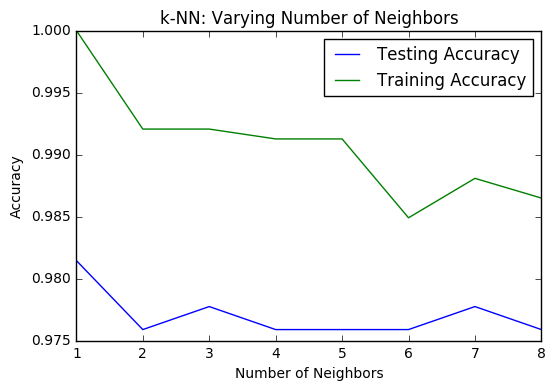

In [24]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 7 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

## Model Performance based on Cross Validation

In [25]:
#cross validation 
cv_results = cross_val_score(knn, X, y, cv= 5)
print(cv_results)
print(np.mean(cv_results))

[ 0.93681319  0.9558011   0.96935933  0.97759104  0.94929577]
0.957772086865


## Fine Tuning your model / Metrics for classification

In [26]:
y_pred = knn.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  1  0  0  0  3  2]
 [ 0  0 53  0  0  0  0  0  1  0]
 [ 0  0  0 54  0  0  0  0  2  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  1  1  0  0 54  0  0]
 [ 0  0  0  0  0  0  0  0 46  1]
 [ 0  0  0  0  1  0  0  0  0 51]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        53
          1       1.00      0.90      0.95        61
          2       1.00      0.98      0.99        54
          3       0.98      0.96      0.97        56
          4       0.94      1.00      0.97        51
          5       1.00      1.00      1.00        55
          6       1.00      1.00      1.00        54
          7       1.00      0.96      0.98        56
          8       0.88      0.98      0.93        47
          9       0.94      0.98      0.96        52

avg / total       0.98      0.98      0.98       539



## Hyper Parameter Tuning with GridSearchCV for KNN Model

In [28]:
from sklearn.grid_search import GridSearchCV

param_grid = {'n_neighbors' : np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X, y)

print('Tuned KNeigborsClassifier Parameter : {}'.format(knn_cv.best_params_))
print('Best Score is : {}'.format(knn_cv.best_score_))

Tuned KNeigborsClassifier Parameter : {'n_neighbors': 2}
Best Score is : 0.9666110183639399
